In [39]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scienceplots
plt.style.use('science')
plt.rcParams.update({'font.size': 20,})

In [6]:
df = pd.read_excel('exptdat.xlsx').dropna()

In [7]:
df

,C (Micro Farad),R1 (Ohm),R2 (Ohm),f_Theo(Hz),T_H (Expt) (s),T_2(Expt)(s),T(Expt)(s),f_expt(Hz),Exp Duty (%),Theoretical Duty (%),Error(%)
0,0.001,1000.0,10000.0,68699.484410,0.000007,0.000007,0.000014,69444.444440,0.500000,0.52381,1.084375
1,0.001,10000.0,100000.0,6869.948441,0.000074,0.000066,0.000140,7142.857143,0.528571,0.52381,3.972500
2,0.001,100000.0,1000000.0,686.994844,0.000730,0.00067,0.001400,714.285714,0.521429,0.52381,3.972500
3,0.010,1000.0,10000.0,6869.948441,0.000084,0.000076,0.000160,6250.000000,0.525000,0.52381,9.024062
4,0.010,10000.0,100000.0,686.994844,0.000870,0.00079,0.001660,602.409639,0.524096,0.52381,12.312349
5,0.010,100000.0,1000000.0,68.699484,0.007800,0.0081,0.015900,62.893082,0.490566,0.52381,8.451887
6,0.100,1000.0,10000.0,686.994844,0.000440,0.00042,0.000860,1162.790698,0.511628,0.52381,69.257558
7,0.100,10000.0,100000.0,68.699484,0.004800,0.0048,0.009600,104.166667,0.500000,0.52381,51.626562
8,0.100,100000.0,1000000.0,6.869948,0.050000,0.048,0.098000,10.204082,0.510204,0.52381,48.532143
9,1.000,1000.0,10000.0,68.699484,0.007500,0.007,0.014500,68.965517,0.517241,0.52381,0.387241


In [49]:
fe = np.asarray(df['f_expt(Hz)'])
lfe = np.log10(fe)
ft = np.asarray(df['f_Theo(Hz)'])
lft = np.log10(ft)

def linfit(x,a,b):
    return a*x + b
# Perform a linear fit
from scipy.optimize import curve_fit
popt, pcov = curve_fit(linfit, lfe, lft)
# Extract the slope and intercept
slope, intercept = popt
# Calculate the fitted values
lft_fit = linfit(lfe, slope, intercept)
# Calculate the residuals
residuals = lft - lft_fit
# Calculate the standard deviation of the residuals
std_residuals = np.std(residuals)
# Calculate the standard deviation of the slope
std_slope = np.sqrt(pcov[0][0])
# Calculate the standard deviation of the intercept
std_intercept = np.sqrt(pcov[1][1])

slope,std_slope


(np.float64(0.9948133645042871), np.float64(0.014403625653652781))

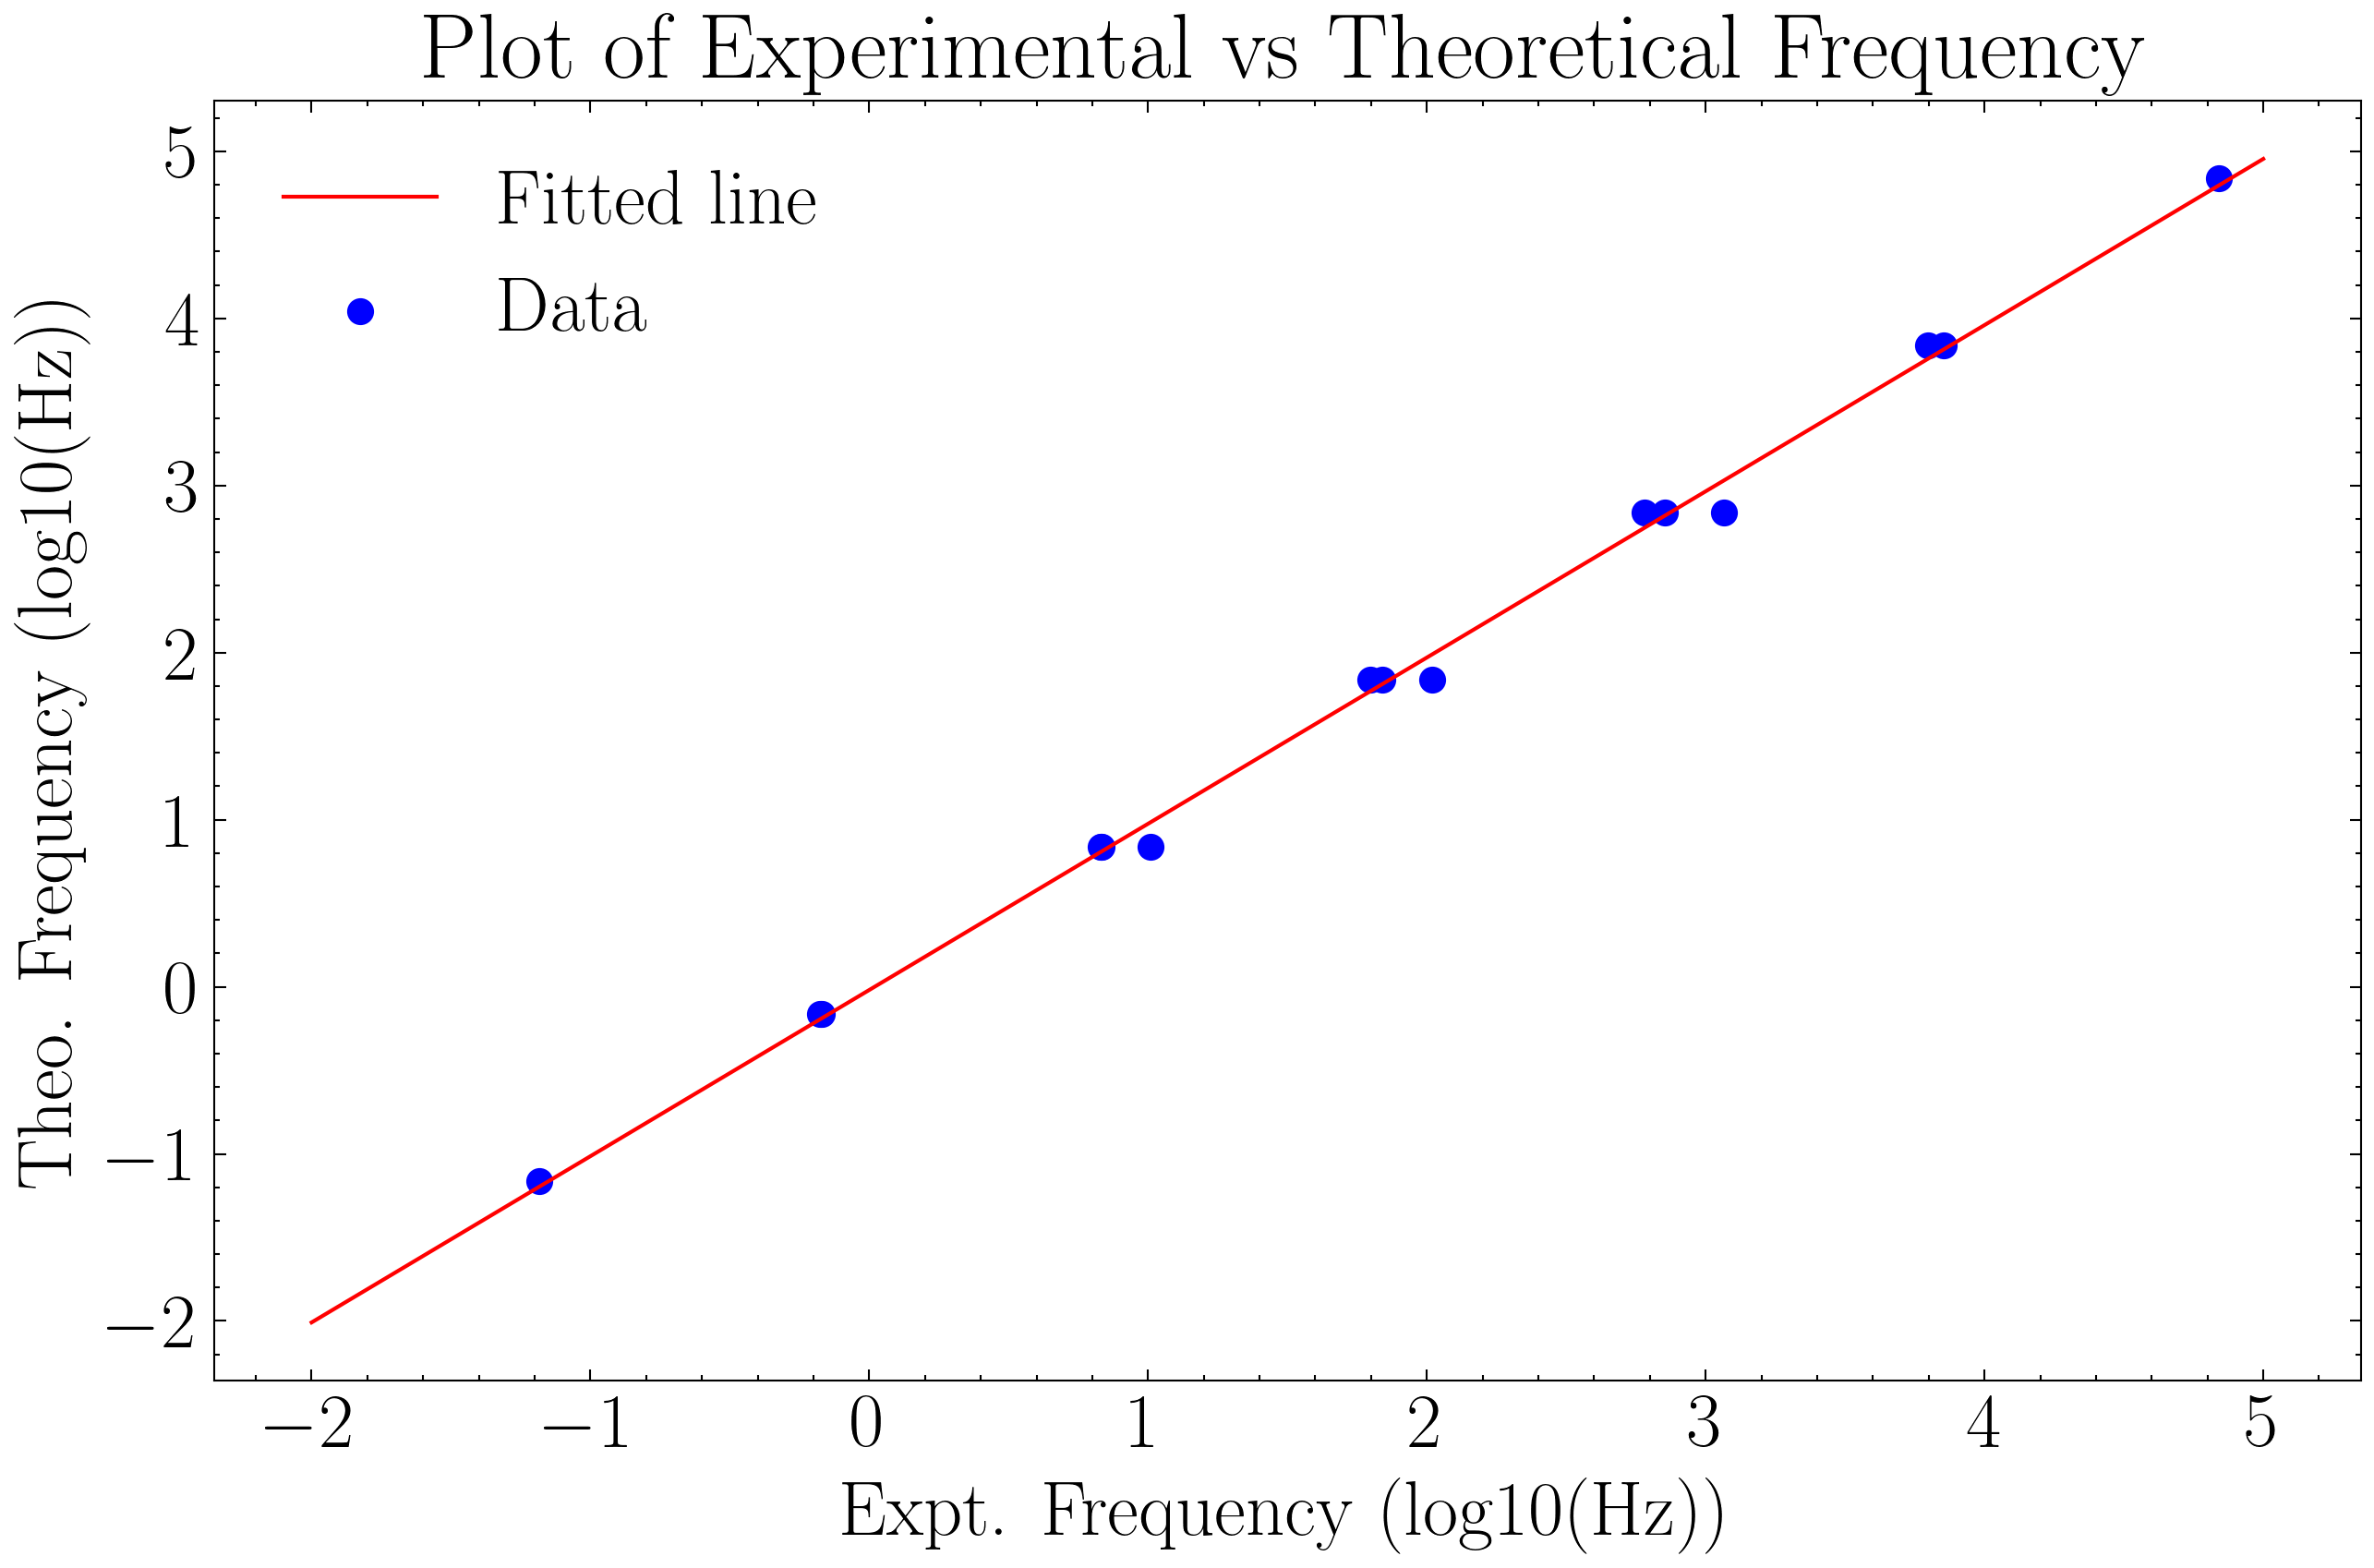

In [48]:
xval = np.linspace(-2, 5, 1000)
# Plot the data and the fitted line
plt.figure(figsize=(10, 6), dpi = 300)
plt.plot(xval, linfit(xval, slope, intercept), 'r-', label='Fitted line')
plt.xlabel("Expt. Frequency (log10(Hz))")
plt.ylabel("Theo. Frequency (log10(Hz))")
plt.title("Plot of Experimental vs Theoretical Frequency")
# plt.errorbar(lfe, lft, yerr=std_residuals, fmt='o', color='blue', label='Data with error bars')
plt.scatter(lfe, lft,color='blue', label='Data')
plt.legend()
plt.savefig('expt_vs_theo.png', dpi=300)

In [10]:
fe

array([6.94444444e+04, 7.14285714e+03, 7.14285714e+02, 6.25000000e+03,
       6.02409639e+02, 6.28930818e+01, 1.16279070e+03, 1.04166667e+02,
       1.02040816e+01, 6.89655172e+01, 6.80272109e+00, 6.75675676e-01,
       6.66666667e-01, 6.53594771e-02, 6.75675676e+00])